In [1]:
#! /usr/bin/python3
# author : Priyanshu Shrivastav (from IIT Palakkad, India)

import numpy as np, matplotlib.pyplot as plt
import csv, sys
from sklearn.preprocessing import MinMaxScaler

file_name = input("file index : ")
DATA_SIZE = 10000
PARAMETER_COUNT = 2
TRAIN_DATA_SET  = "Train" + file_name + ".csv"
TEST_DATA_SET   = "Test" + file_name + ".csv"
ALPHA           = 0.001

train_sz, test_sz, loss = 0, 0, []
X = np.ndarray((DATA_SIZE, PARAMETER_COUNT + 1)) # +1 for bias
Y = np.zeros(DATA_SIZE, dtype=int)
W = np.ndarray(PARAMETER_COUNT + 1)
min_max_scaler = MinMaxScaler()

class Perceptron:
    # Take training input data
    def take_training_input(self):
        global train_sz
        train_sz = 0
        with open(TRAIN_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[train_sz][p] = float(row[p])
                X[train_sz][PARAMETER_COUNT] = 1.0
                Y[train_sz] = float(row[PARAMETER_COUNT])
                if Y[train_sz] == 0:
                    Y[train_sz] = -1
                train_sz += 1

# plot training data data
    def show_data(self, title, xlab="", ylab=""):
        print('=== Data points given to train : {sz} ==='.format(sz=train_sz))
        plt.title(title)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        for train_data_index in range(train_sz):
            if (Y[train_data_index] == 1):
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'bo')
            else:
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'ro')

# find weights
    def find_weights(self):
        global train_sz, W, loss
        print("================================       TRAINING       ==================================")
        print("Training data size : {tz}".format(tz=train_sz))
        W = np.random.random(PARAMETER_COUNT + 1)
        ok = False
        epoch = 0
        while ok is False:
            if epoch > 500: # linear classification not possible
                break
            W_old, x_add, y_real = np.copy(W), [], 0
            epoch += 1
            ok = True
            err_cnt = 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and Y[tc] < 0):
                    x_add = np.copy(-1*X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                elif (y_hat < 0 and Y[tc] > 0):
                    x_add = np.copy(X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                loss.append(err_cnt)

            err_pos, err_neg, tp, tn = 0, 0, 0, 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and y_real < 0):
                    err_neg += 1
                elif (y_hat < 0 and y_real > 0):
                    err_pos += 1
                elif (y_real > 0):
                    tp += 1
                elif (y_real < 0):
                    tn += 1

            print("----------------------------------------------------------------------------------------")
            print("[ Epoch : {epoch} ], [ error count : {err} ]".format(epoch=epoch, err=err_cnt))
            print("W_old : {w_old}".format(w_old=W_old))
            print("W_new : {w_new}".format(w_new=W))
            print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
            print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))

    def draw_line_2d(self):
        global train_sz, W
        mx_x1, mx_x2 = -1e9, -1e9
        mn_x1, mn_x2 = 1e9, 1e9
        for tc in range(train_sz):
            mx_x1 = max(mx_x1, X[tc][0])
            mn_x1 = min(mn_x1, X[tc][0])
        X1 = np.linspace(mn_x1, mx_x1, 1000)
        # 0 = w[0]*x[0] + w[1]*x[1] + w[2]*x[3]
        X2 = []
        for x in X1:
            X2.append(-1*(W[0]*x + W[2]*1.0)/W[1])
        plt.plot(X1, X2)


    def take_test_input(self):
        global test_sz, X, Y
        test_sz = 0
        with open(TEST_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[test_sz][p] = float(row[p])
                X[test_sz][PARAMETER_COUNT] = 1.0
                Y[test_sz] = float(row[PARAMETER_COUNT])
                if Y[test_sz] == 0:
                    Y[test_sz] = -1
                test_sz += 1

    def test(self):
        global test_sz, X, Y, loss, W
        print("================================       TESTING        ==================================")
        print("Test Data size : ", test_sz)
        loss, err_pos, err_neg, tp, tn = [], 0, 0, 0, 0
        for tc in range(test_sz):
            y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
            if (y_hat > 0 and y_real < 0):
                err_neg += 1
            elif (y_hat < 0 and y_real > 0):
                err_pos += 1
            elif (y_real > 0):
                tp += 1
            elif (y_real < 0):
                tn += 1
        print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
        print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))
        print("============================         TESTING FINISHED          =========================")

    def draw_error_count(self):
        global loss, train_sz
        ep = [epoch + 1 for epoch in range(len(loss))]
        accuracy = [train_sz - x for x in loss]
        plt.title("Classification Error v/s iterations")
        plt.ylabel("Classification Error")
        plt.xlabel("Iterations")
        plt.plot(ep, loss, 'r')
        plt.show()

        plt.title("Classification Accuracy v/s iterations")
        plt.ylabel("Classification Accuracy")
        plt.xlabel("Iterations")
        plt.plot(ep, accuracy, 'b')
        plt.show()


file index : 7


In [2]:
t = Perceptron()
t.take_training_input()

In [3]:
t.find_weights()

================================       TRAINING       ==================================
Training data size : 800
----------------------------------------------------------------------------------------
[ Epoch : 1 ], [ error count : 406 ]
W_old : [0.13361411 0.05715068 0.79763972]
W_new : [ 0.1258921  -0.19801811  0.39163972]
True positive : 394, False positive : 406
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 2 ], [ error count : 254 ]
W_old : [ 0.1258921  -0.19801811  0.39163972]
W_new : [ 0.07492356 -0.32707156  0.14163972]
True positive : 383, False positive : 122
True negative : 284, False negative : 11
----------------------------------------------------------------------------------------
[ Epoch : 3 ], [ error count : 116 ]
W_old : [ 0.07492356 -0.32707156  0.14163972]
W_new : [ 0.03719624 -0.33458145  0.07763972]
True positive : 349, False positive : 68
True negative : 338, False nega

----------------------------------------------------------------------------------------
[ Epoch : 51 ], [ error count : 151 ]
W_old : [ 0.00092577 -0.00452035 -0.00036028]
W_new : [ 0.00086639 -0.00493653  0.00063972]
True positive : 341, False positive : 41
True negative : 365, False negative : 53
----------------------------------------------------------------------------------------
[ Epoch : 52 ], [ error count : 135 ]
W_old : [ 0.00086639 -0.00493653  0.00063972]
W_new : [ 0.00112198 -0.00495809 -0.00036028]
True positive : 298, False positive : 22
True negative : 384, False negative : 96
----------------------------------------------------------------------------------------
[ Epoch : 53 ], [ error count : 136 ]
W_old : [ 0.00112198 -0.00495809 -0.00036028]
W_new : [ 0.00092352 -0.00542645 -0.00036028]
True positive : 283, False positive : 14
True negative : 392, False negative : 111
----------------------------------------------------------------------------------------
[ Epoch

----------------------------------------------------------------------------------------
[ Epoch : 99 ], [ error count : 136 ]
W_old : [ 0.00111655 -0.00495785 -0.00036028]
W_new : [ 0.00091808 -0.00542621 -0.00036028]
True positive : 283, False positive : 14
True negative : 392, False negative : 111
----------------------------------------------------------------------------------------
[ Epoch : 100 ], [ error count : 132 ]
W_old : [ 0.00091808 -0.00542621 -0.00036028]
W_new : [ 0.00116016 -0.00480716 -0.00036028]
True positive : 302, False positive : 23
True negative : 383, False negative : 92
----------------------------------------------------------------------------------------
[ Epoch : 101 ], [ error count : 136 ]
W_old : [ 0.00116016 -0.00480716 -0.00036028]
W_new : [ 0.00092652 -0.00542436 -0.00036028]
True positive : 283, False positive : 14
True negative : 392, False negative : 111
----------------------------------------------------------------------------------------
[ Ep

----------------------------------------------------------------------------------------
[ Epoch : 131 ], [ error count : 135 ]
W_old : [ 0.00086169 -0.00493646  0.00063972]
W_new : [ 0.00111728 -0.00495802 -0.00036028]
True positive : 297, False positive : 20
True negative : 386, False negative : 97
----------------------------------------------------------------------------------------
[ Epoch : 132 ], [ error count : 136 ]
W_old : [ 0.00111728 -0.00495802 -0.00036028]
W_new : [ 0.00091881 -0.00542638 -0.00036028]
True positive : 283, False positive : 14
True negative : 392, False negative : 111
----------------------------------------------------------------------------------------
[ Epoch : 133 ], [ error count : 132 ]
W_old : [ 0.00091881 -0.00542638 -0.00036028]
W_new : [ 0.00116089 -0.00480733 -0.00036028]
True positive : 302, False positive : 23
True negative : 383, False negative : 92
----------------------------------------------------------------------------------------
[ Ep

----------------------------------------------------------------------------------------
[ Epoch : 182 ], [ error count : 143 ]
W_old : [ 2.80414700e-05 -4.87294066e-03  6.39722401e-04]
W_new : [ 0.00096421 -0.00465986 -0.00036028]
True positive : 291, False positive : 18
True negative : 388, False negative : 103
----------------------------------------------------------------------------------------
[ Epoch : 183 ], [ error count : 150 ]
W_old : [ 0.00096421 -0.00465986 -0.00036028]
W_new : [ 0.00089402 -0.00454693 -0.00036028]
True positive : 286, False positive : 16
True negative : 390, False negative : 108
----------------------------------------------------------------------------------------
[ Epoch : 184 ], [ error count : 145 ]
W_old : [ 0.00089402 -0.00454693 -0.00036028]
W_new : [ 0.00081851 -0.00443405  0.00063972]
True positive : 342, False positive : 46
True negative : 360, False negative : 52
--------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 232 ], [ error count : 132 ]
W_old : [ 0.00115524 -0.00483767 -0.00036028]
W_new : [ 0.0009069  -0.00452544 -0.00036028]
True positive : 287, False positive : 16
True negative : 390, False negative : 107
----------------------------------------------------------------------------------------
[ Epoch : 233 ], [ error count : 145 ]
W_old : [ 0.0009069  -0.00452544 -0.00036028]
W_new : [ 0.00074445 -0.00478545  0.00063972]
True positive : 338, False positive : 40
True negative : 366, False negative : 56
----------------------------------------------------------------------------------------
[ Epoch : 234 ], [ error count : 131 ]
W_old : [ 0.00074445 -0.00478545  0.00063972]
W_new : [ 0.00116059 -0.00485331 -0.00036028]
True positive : 302, False positive : 23
True negative : 383, False negative : 92
----------------------------------------------------------------------------------------
[ Ep

----------------------------------------------------------------------------------------
[ Epoch : 260 ], [ error count : 136 ]
W_old : [ 0.00113312 -0.00479026 -0.00036028]
W_new : [ 0.00098206 -0.00445435 -0.00036028]
True positive : 291, False positive : 19
True negative : 387, False negative : 103
----------------------------------------------------------------------------------------
[ Epoch : 261 ], [ error count : 150 ]
W_old : [ 0.00098206 -0.00445435 -0.00036028]
W_new : [ 0.00087669 -0.00449027 -0.00036028]
True positive : 286, False positive : 16
True negative : 390, False negative : 108
----------------------------------------------------------------------------------------
[ Epoch : 262 ], [ error count : 145 ]
W_old : [ 0.00087669 -0.00449027 -0.00036028]
W_new : [ 4.01587518e-05 -4.92258120e-03  6.39722401e-04]
True positive : 301, False positive : 37
True negative : 369, False negative : 93
--------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 314 ], [ error count : 145 ]
W_old : [ 0.00081679 -0.00414385 -0.00036028]
W_new : [ 0.00071965 -0.00409254  0.00063972]
True positive : 342, False positive : 47
True negative : 359, False negative : 52
----------------------------------------------------------------------------------------
[ Epoch : 315 ], [ error count : 140 ]
W_old : [ 0.00071965 -0.00409254  0.00063972]
W_new : [ 0.00075446 -0.00453914  0.00063972]
True positive : 341, False positive : 43
True negative : 363, False negative : 53
----------------------------------------------------------------------------------------
[ Epoch : 316 ], [ error count : 140 ]
W_old : [ 0.00075446 -0.00453914  0.00063972]
W_new : [ 0.00079261 -0.00426638  0.00063972]
True positive : 343, False positive : 47
True negative : 359, False negative : 51
----------------------------------------------------------------------------------------
[ Epo

----------------------------------------------------------------------------------------
[ Epoch : 350 ], [ error count : 150 ]
W_old : [ 0.00097199 -0.00440741 -0.00036028]
W_new : [ 0.00086662 -0.00444333 -0.00036028]
True positive : 286, False positive : 16
True negative : 390, False negative : 108
----------------------------------------------------------------------------------------
[ Epoch : 351 ], [ error count : 145 ]
W_old : [ 0.00086662 -0.00444333 -0.00036028]
W_new : [ 3.00900528e-05 -4.87563924e-03  6.39722401e-04]
True positive : 300, False positive : 38
True negative : 368, False negative : 94
----------------------------------------------------------------------------------------
[ Epoch : 352 ], [ error count : 143 ]
W_old : [ 3.00900528e-05 -4.87563924e-03  6.39722401e-04]
W_new : [ 0.00096626 -0.00466256 -0.00036028]
True positive : 291, False positive : 18
True negative : 388, False negative : 103
--------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 385 ], [ error count : 149 ]
W_old : [ 0.00082725 -0.00445317 -0.00036028]
W_new : [-2.83648023e-05 -4.71371161e-03  6.39722401e-04]
True positive : 296, False positive : 40
True negative : 366, False negative : 98
----------------------------------------------------------------------------------------
[ Epoch : 386 ], [ error count : 142 ]
W_old : [-2.83648023e-05 -4.71371161e-03  6.39722401e-04]
W_new : [ 8.03644397e-05 -5.04951081e-03  6.39722401e-04]
True positive : 301, False positive : 36
True negative : 370, False negative : 93
----------------------------------------------------------------------------------------
[ Epoch : 387 ], [ error count : 144 ]
W_old : [ 8.03644397e-05 -5.04951081e-03  6.39722401e-04]
W_new : [ 0.00076908 -0.00416077  0.00063972]
True positive : 343, False positive : 47
True negative : 359, False negative : 51
----------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 425 ], [ error count : 143 ]
W_old : [ 0.00083652 -0.00456203 -0.00036028]
W_new : [ 0.00060766 -0.00447501  0.00063972]
True positive : 332, False positive : 41
True negative : 365, False negative : 62
----------------------------------------------------------------------------------------
[ Epoch : 426 ], [ error count : 134 ]
W_old : [ 0.00060766 -0.00447501  0.00063972]
W_new : [ 4.56618926e-06 -4.06042412e-03  6.39722401e-04]
True positive : 303, False positive : 44
True negative : 362, False negative : 91
----------------------------------------------------------------------------------------
[ Epoch : 427 ], [ error count : 142 ]
W_old : [ 4.56618926e-06 -4.06042412e-03  6.39722401e-04]
W_new : [ 0.00072433 -0.00412614  0.00063972]
True positive : 342, False positive : 47
True negative : 359, False negative : 52
----------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 468 ], [ error count : 146 ]
W_old : [ 0.00086554 -0.00444043 -0.00036028]
W_new : [ 0.00081962 -0.0041484  -0.00036028]
True positive : 286, False positive : 15
True negative : 391, False negative : 108
----------------------------------------------------------------------------------------
[ Epoch : 469 ], [ error count : 145 ]
W_old : [ 0.00081962 -0.0041484  -0.00036028]
W_new : [ 0.00072248 -0.00409709  0.00063972]
True positive : 342, False positive : 47
True negative : 359, False negative : 52
----------------------------------------------------------------------------------------
[ Epoch : 470 ], [ error count : 134 ]
W_old : [ 0.00072248 -0.00409709  0.00063972]
W_new : [ 3.86081626e-05 -4.18153810e-03  6.39722401e-04]
True positive : 304, False positive : 44
True negative : 362, False negative : 90
---------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 498 ], [ error count : 147 ]
W_old : [ 3.77409310e-05 -4.90641258e-03  6.39722401e-04]
W_new : [ 0.00092976 -0.0045203  -0.00036028]
True positive : 289, False positive : 17
True negative : 389, False negative : 105
----------------------------------------------------------------------------------------
[ Epoch : 499 ], [ error count : 151 ]
W_old : [ 0.00092976 -0.0045203  -0.00036028]
W_new : [ 0.00087038 -0.00493648  0.00063972]
True positive : 341, False positive : 41
True negative : 365, False negative : 53
----------------------------------------------------------------------------------------
[ Epoch : 500 ], [ error count : 135 ]
W_old : [ 0.00087038 -0.00493648  0.00063972]
W_new : [ 0.00112597 -0.00495804 -0.00036028]
True positive : 299, False positive : 22
True negative : 384, False negative : 95
---------------------------------------------------------------------------------

=== Data points given to train : 800 ===


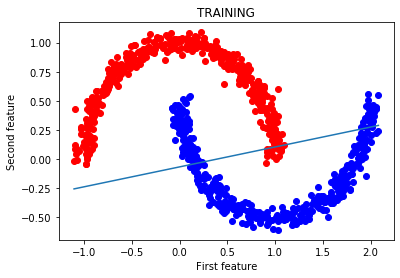

In [4]:
t.show_data("TRAINING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()

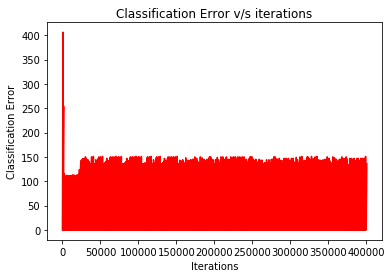

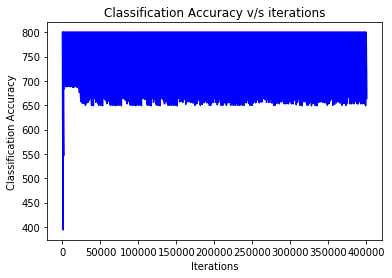

In [5]:
t.draw_error_count()

In [6]:
t.take_test_input()
t.test()

================================       TESTING        ==================================
Test Data size :  200
True positive : 86, False positive : 1
True negative : 93, False negative : 20
============================         TESTING FINISHED          =========================


=== Data points given to train : 800 ===


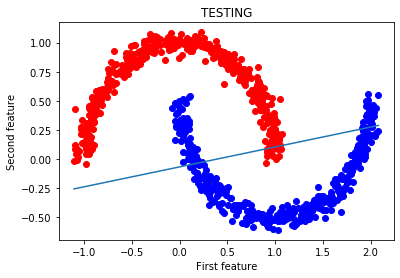

In [7]:
t.show_data("TESTING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()

In [8]:
# Data not linearly seperable. Hence perceptron fails.